# Example usage of the BTD class

In [5]:
import pybbtd.btd as btd
from pybbtd.solvers import btd_als
import numpy as np
from pybbtd.visualization import draw_metrics

In [6]:
# Define tensor size and BTD parameters
N1, N2, N3 = 80, 100, 4  # dimensions of the tensor
R = 3  # number of BTD terms
L = 5  # rank of each term

# Generate BTD model
X = btd.BTD([N1, N2, N3], R, L, block_mode="LL1")

Sufficient condition for uniqueness satisfied


In [10]:
# Create ground truth tensor
A0, B0, C0 = btd_als.init_BTD_factors(X, strat="random")
# This is the constraint matrix to represent BTD-LL1 as a CPD model
theta = X.get_constraint_matrix()

T_observed = btd.factors_to_tensor(
    A0, B0, C0, theta, block_mode="LL1"
) + 1 * 1e-6 * np.random.randn(*X.dims)

Exiting early due to unsufficient decrease of cost


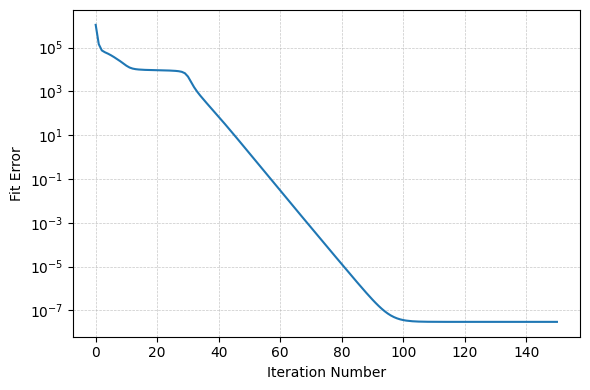

In [14]:
# Fit the model using random initialization
X.fit(T_observed, max_iter=3000, init="random", rel_tol=1e-9, abs_tol=1e-15)

# Save the fit error for comparison with SVD init
rand_init_fit_error = X.fit_error

# Retrieve the estimated factors if necessary
A_est, B_est, C_est = X.factors

# Check convergence curve
draw_metrics.plot_error(X.fit_error)

Exiting early due to unsufficient decrease of cost


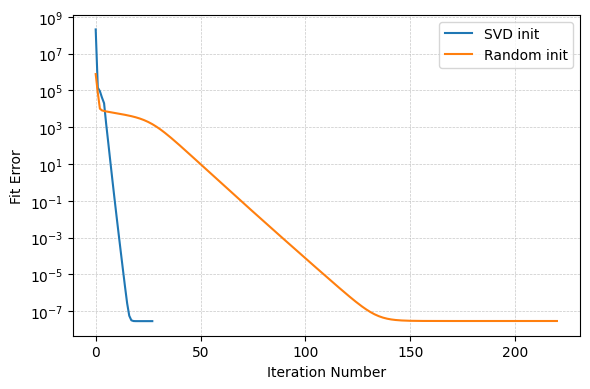

In [7]:
# compare with SVD init

X.fit(T_observed, max_iter=3000, init="svd", rel_tol=1e-9, abs_tol=1e-15)
svd_init_fit_error = X.fit_error
draw_metrics.plot_error(
    [svd_init_fit_error, rand_init_fit_error], labels=[r"SVD init", r"Random init"]
)